# 9.3

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

%matplotlib inline

In [2]:
sample_size = 100
gamma = 0.95
sample = st.norm.rvs(size = sample_size)
x = np.arange(1, sample_size + 1)

$X_i \sim N(a, \sigma^2), i = 1,..,100$

# (a) ДИ для $a$ при известном $\sigma^2$

Пусть $\sigma^2$ известно и равно 1, найдем точный доверительный интервал для $a$:

Случайная величина $\sqrt{n}\frac{\overline{X} - a}{\sigma} \sim N(0, 1)$, поэтому $P(u_{\frac{1-\gamma}{2}} < \sqrt{n}\frac{\overline{X} - a}{\sigma} < u_{\frac{1+\gamma}{2}}) = \gamma$, где $u_{\frac{1-\gamma}{2}} = -u_{\frac{1+\gamma}{2}}$ - квантили стандартного нормального распределения.

Тогда ДИ для $a: (\overline{X} - u_{\frac{1+\gamma}{2}}\frac{\sigma}{\sqrt{n}}, \overline{X} + u_{\frac{1+\gamma}{2}}\frac{\sigma}{\sqrt{n}})$

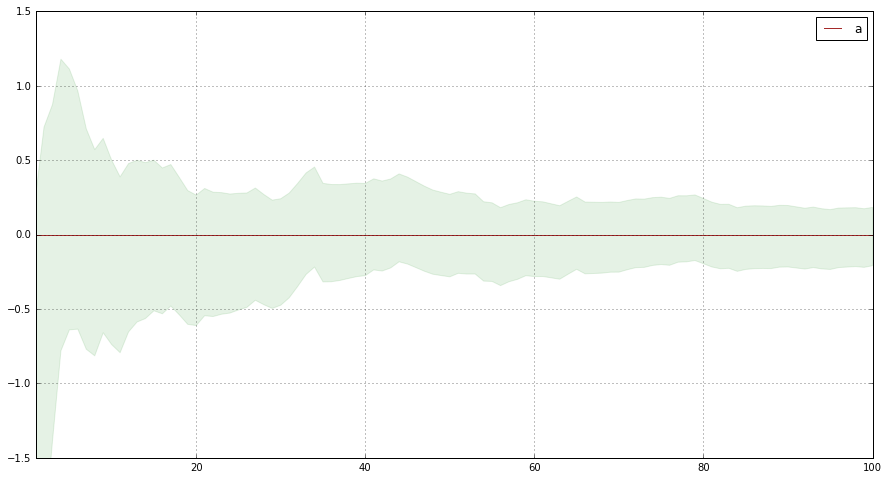

In [3]:
means = sample.cumsum() / x
plt.figure(figsize=(15, 8))
plt.plot(x, np.zeros(sample_size), color='brown', label='a')
plt.fill_between(x, means - st.norm.ppf(1/2+gamma/2)*(x**(-1/2)), 
                 means + st.norm.ppf(1/2+gamma/2)*(x**(-1/2)), alpha=0.1, color='green')
plt.legend()
plt.xlim((1, 100))  
plt.ylim((-1.5, 1.5))  
plt.grid()
plt.show()

Истинное значение $a$ попадает в ДИ. 

# (b) ДИ для $\sigma^2$ при известном $a$

Пусть a известно и равно 0, найдем точный доверительный интервал для $\sigma^2$:

Случайная величина $\frac{\sum_{i = 1}^{n}(X_i - a)^2}{\sigma^2} \sim \chi^2_{n}$

Тогда $P(u_{\frac{1-\gamma}{2}} < \frac{\sum_{i = 1}^{n}(X_i - a)^2}{\sigma^2} < u_{\frac{1+\gamma}{2}}) = \gamma$, где $u_{\frac{1-\gamma}{2}} и u_{\frac{1+\gamma}{2}}$ - квантили $\chi^2_{n}$

ДИ для $\sigma^2: (\frac{\sum_{i = 1}^{n}(X_i - a)^2}{u_{\frac{1+\gamma}{2}}}, \frac{\sum_{i = 1}^{n}(X_i - a)^2}{u_{\frac{1-\gamma}{2}}})$

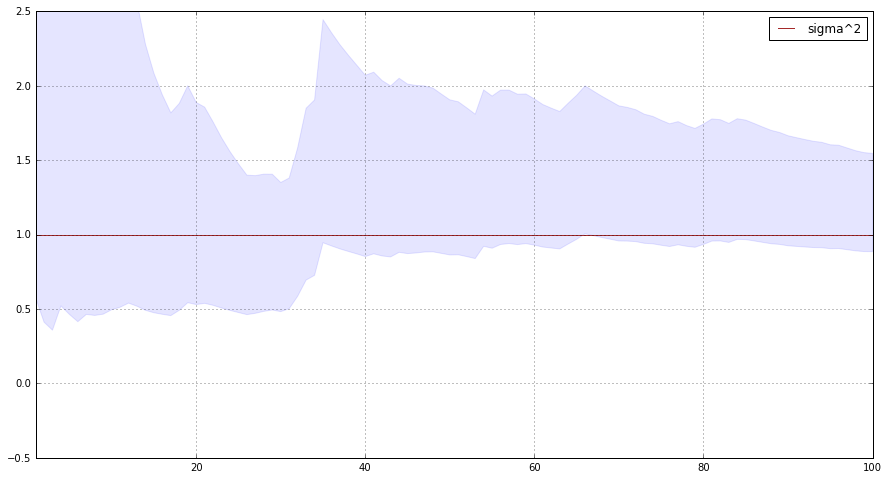

In [68]:
plt.figure(figsize=(15, 8))
plt.plot(x, np.ones(sample_size), color='brown', label='sigma^2')
plt.fill_between(x, (sample**2).cumsum()/st.chi2.ppf(1/2 + gamma/2, x), 
                 (sample**2).cumsum()/st.chi2.ppf(1/2 - gamma/2, x), alpha=0.1, color='blue')
plt.legend()
plt.xlim((1, 100))  
plt.ylim((-0.5, 2.5))  
plt.grid()
plt.show()

Истинное значение $\sigma^2$ попадает в ДИ.

# (с) ДИ для $a$ при неизвестном $\sigma^2$

Пусть $\sigma^2$ неизвестно, найдем точный доверительный интервал для $a$:

Случайная величина $\sqrt{n}\frac{\overline{X} - a}{S} \sim T_{n-1}$, где $T_{n-1}$ - распределение Стьюдента с $n-1$ степенями свободы, а $S^2 = \frac{1}{n-1}\sum_{i = 1}^n(X_i - \overline{X})^2$ - оценка $\sigma^2$

Тогда $P(u_{\frac{1-\gamma}{2}} < \sqrt{n}\frac{\overline{X} - a}{S} < u_{\frac{1+\gamma}{2}}) = \gamma$, где $u_{\frac{1-\gamma}{2}} = -u_{\frac{1+\gamma}{2}}$ - квантили из распределения Стьюдента с n-1 степенями свободы.

ДИ для $a: (\overline{X} - u_{\frac{1+\gamma}{2}}\frac{S}{\sqrt{n}}, \overline{X} + u_{\frac{1+\gamma}{2}}\frac{S}{\sqrt{n}})$

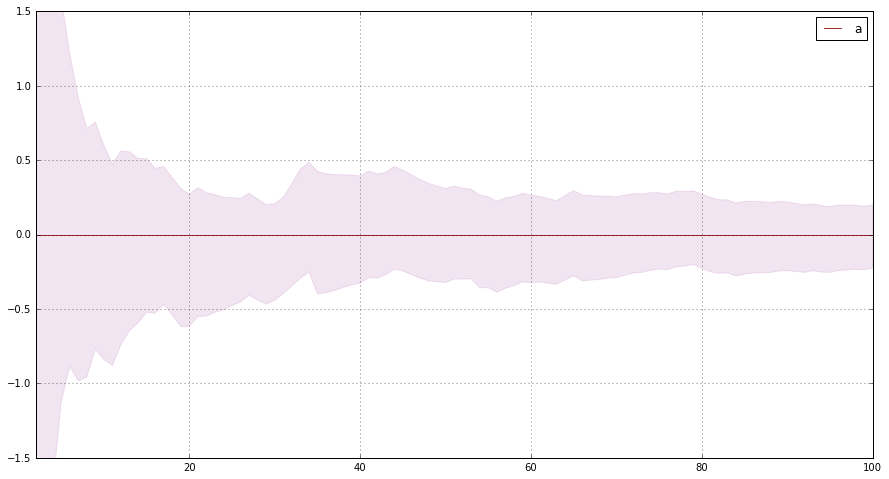

In [69]:
S = np.array([])
for k in range(1,sample_size+1):
    S = np.append(S, sum([(sample[i] - sample.sum()/sample_size)**2 for i in range(sample_size)][:k])/k)

plt.figure(figsize=(15, 8))
plt.plot(x, np.zeros(sample_size), color='brown', label='a')
plt.fill_between(x, means - st.t.ppf(1/2+gamma/2, x-1)*S**(1/2)*(x)**(-1/2), 
                 means + st.t.ppf(1/2+gamma/2, x-1)*S**(1/2)*(x)**(-1/2), alpha=0.1, color='purple')
plt.legend()
plt.xlim((2, 100))  
plt.ylim((-1.5, 1.5))  
plt.grid()
plt.show()

Истинное значение $a$ попадает в ДИ

# (d) ДИ для $\sigma^2$ при неизвестном $a$

Пусть $a$ неизвестно, найдем точный доверительный интервал для $\sigma^2$:

Случайная величина $\frac{(n - 1)S^2}{\sigma^2} \sim \chi^2_{n-1}$, где $S^2 = \frac{1}{n-1}\sum_{i = 1}^n(X_i - \overline{X})^2$ - оценка $\sigma^2$

Тогда $P(u_{\frac{1-\gamma}{2}} < \frac{(n - 1)S^2}{\sigma^2} < u_{\frac{1+\gamma}{2}}) = \gamma$, где $u_{\frac{1-\gamma}{2}} и u_{\frac{1+\gamma}{2}}$ - квантили из хи-квадрат распределения с n-1 степенями свободы.


Отсюда ДИ для $\sigma^2: (\frac{(n - 1)S^2}{u_{\frac{1-\gamma}{2}}}, \frac{(n - 1)S^2}{u_{\frac{1+\gamma}{2}}})$

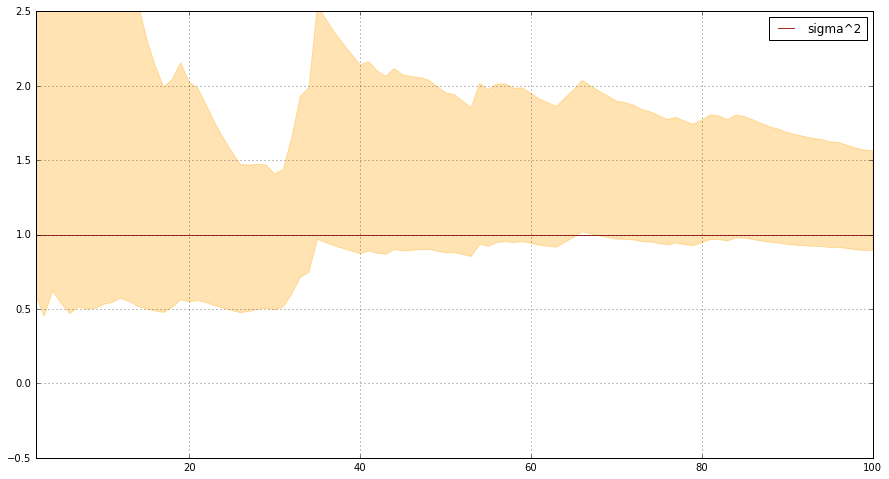

In [70]:
plt.figure(figsize=(15, 8))
plt.plot(x, np.ones(sample_size), color='brown', label='sigma^2')
plt.fill_between(x, x*S/st.chi2.ppf(1/2+gamma/2, x-1), 
                 x*S/st.chi2.ppf(1/2-gamma/2, x-1), alpha=0.3, color='orange')
plt.legend()
plt.xlim((2, 100))  
plt.ylim((-0.5, 2.5))  
plt.grid()
plt.show()

Истинное значение $\sigma^2$ попадает в ДИ

# (e) ДО для $(a, \sigma^2)$

Построим доверительную область для параметров $(a, \sigma^2)$

Воспользуемся независимостью $\overline{X} и S^2$. 

$P(\sqrt{n}\frac{|\overline{X} - a|}{\sigma} < u_{\frac{1+\gamma}{2}}, t_{\frac{1-\gamma}{2}} < \frac{nS^2}{\sigma^2} < t_{\frac{1+\gamma}{2}} ) = \gamma^2$, где $u_p$ - p-квантиль $N(0,1)$, а $t_p$ - p-квантиль $\chi^2_{n-1}$.

Построим доверительную область:

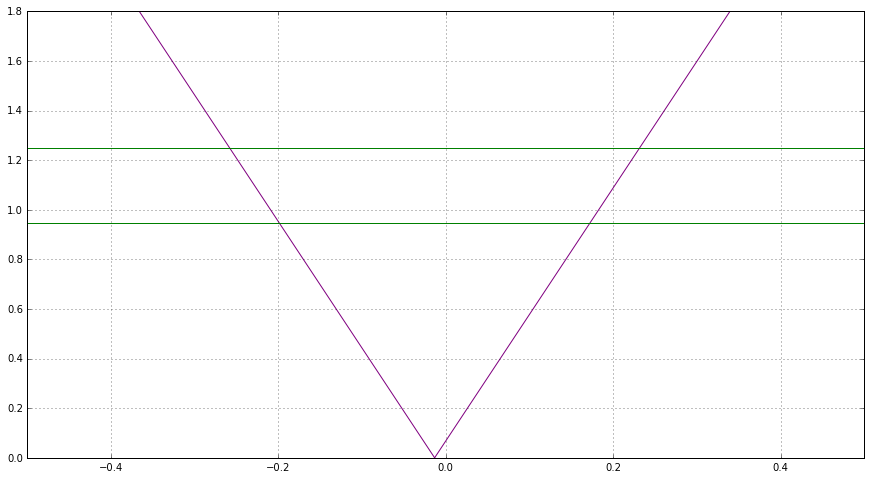

In [67]:
plt.figure(figsize=(15, 8))
a = np.arange(sample.mean() -2.5,sample.mean() + 2.5, 0.05)
y = sample_size**0.5*(sample.mean() - a)/st.norm.ppf(1/2 - gamma/2)
plt.plot(a, y, color = 'purple')
plt.plot(a, -y, color = 'purple')

plt.plot(a, np.ones(sample_size)*(sample_size*S[sample_size - 1]/st.chi2.ppf(1/2-gamma/2, sample_size - 1))**0.5, color='green')
plt.plot(a, np.ones(sample_size)*(sample_size*S[sample_size - 1]/st.chi2.ppf(1/2+gamma/2, sample_size - 1))**0.5, color='green')


plt.ylim([-0,1.8])
plt.xlim([-0.5,0.5])
plt.grid()
plt.show()

Полученная трапеция - доверительная область для $(a, \sigma^2)$. Как мы видим, значения $a = 0, \sigma = 1$ попадают в ДО.